## Training code from here

In [ ]:
!nvidia-smi

Tue Apr 16 07:32:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="ddlh4viKiFCJG5TbgAPp")
project = rf.workspace("parentof-solutions-s7zod").project("car_class-v9eje")
version = project.version(1)
dataset = version.download("folder")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car_class-1 in folder:: 100%|██████████| 293/293 [00:00<00:00, 5289.84it/s]


In [ ]:
%cd {HOME}
!yolo task=classify mode=train model=yolov8s-cls.pt data={dataset.location} epochs=200 imgsz=128

/content
100% 12.2M/12.2M [00:00<00:00, 176MB/s]
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/Car_class-1, epochs=200, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [ ]:
!ls -la {HOME}/runs/classify/train/

total 1140
drwxr-xr-x 3 root root   4096 Apr 16 07:44 .
drwxr-xr-x 3 root root   4096 Apr 16 07:35 ..
-rw-r--r-- 1 root root   1543 Apr 16 07:35 args.yaml
-rw-r--r-- 1 root root 135573 Apr 16 07:44 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 126352 Apr 16 07:44 confusion_matrix.png
-rw-r--r-- 1 root root 189940 Apr 16 07:44 events.out.tfevents.1713252941.f59f731495af.973.0
-rw-r--r-- 1 root root  38592 Apr 16 07:44 results.csv
-rw-r--r-- 1 root root 166872 Apr 16 07:44 results.png
-rw-r--r-- 1 root root  65028 Apr 16 07:35 train_batch0.jpg
-rw-r--r-- 1 root root  63523 Apr 16 07:35 train_batch1.jpg
-rw-r--r-- 1 root root  58114 Apr 16 07:35 train_batch2.jpg
-rw-r--r-- 1 root root  62224 Apr 16 07:43 train_batch3040.jpg
-rw-r--r-- 1 root root  60137 Apr 16 07:43 train_batch3041.jpg
-rw-r--r-- 1 root root  60254 Apr 16 07:43 train_batch3042.jpg
-rw-r--r-- 1 root root  48323 Apr 16 07:44 val_batch0_labels.jpg
-rw-r--r-- 1 root root  48414 Apr 16 07:44 val_batch0_pred.jpg
drwxr-

/content


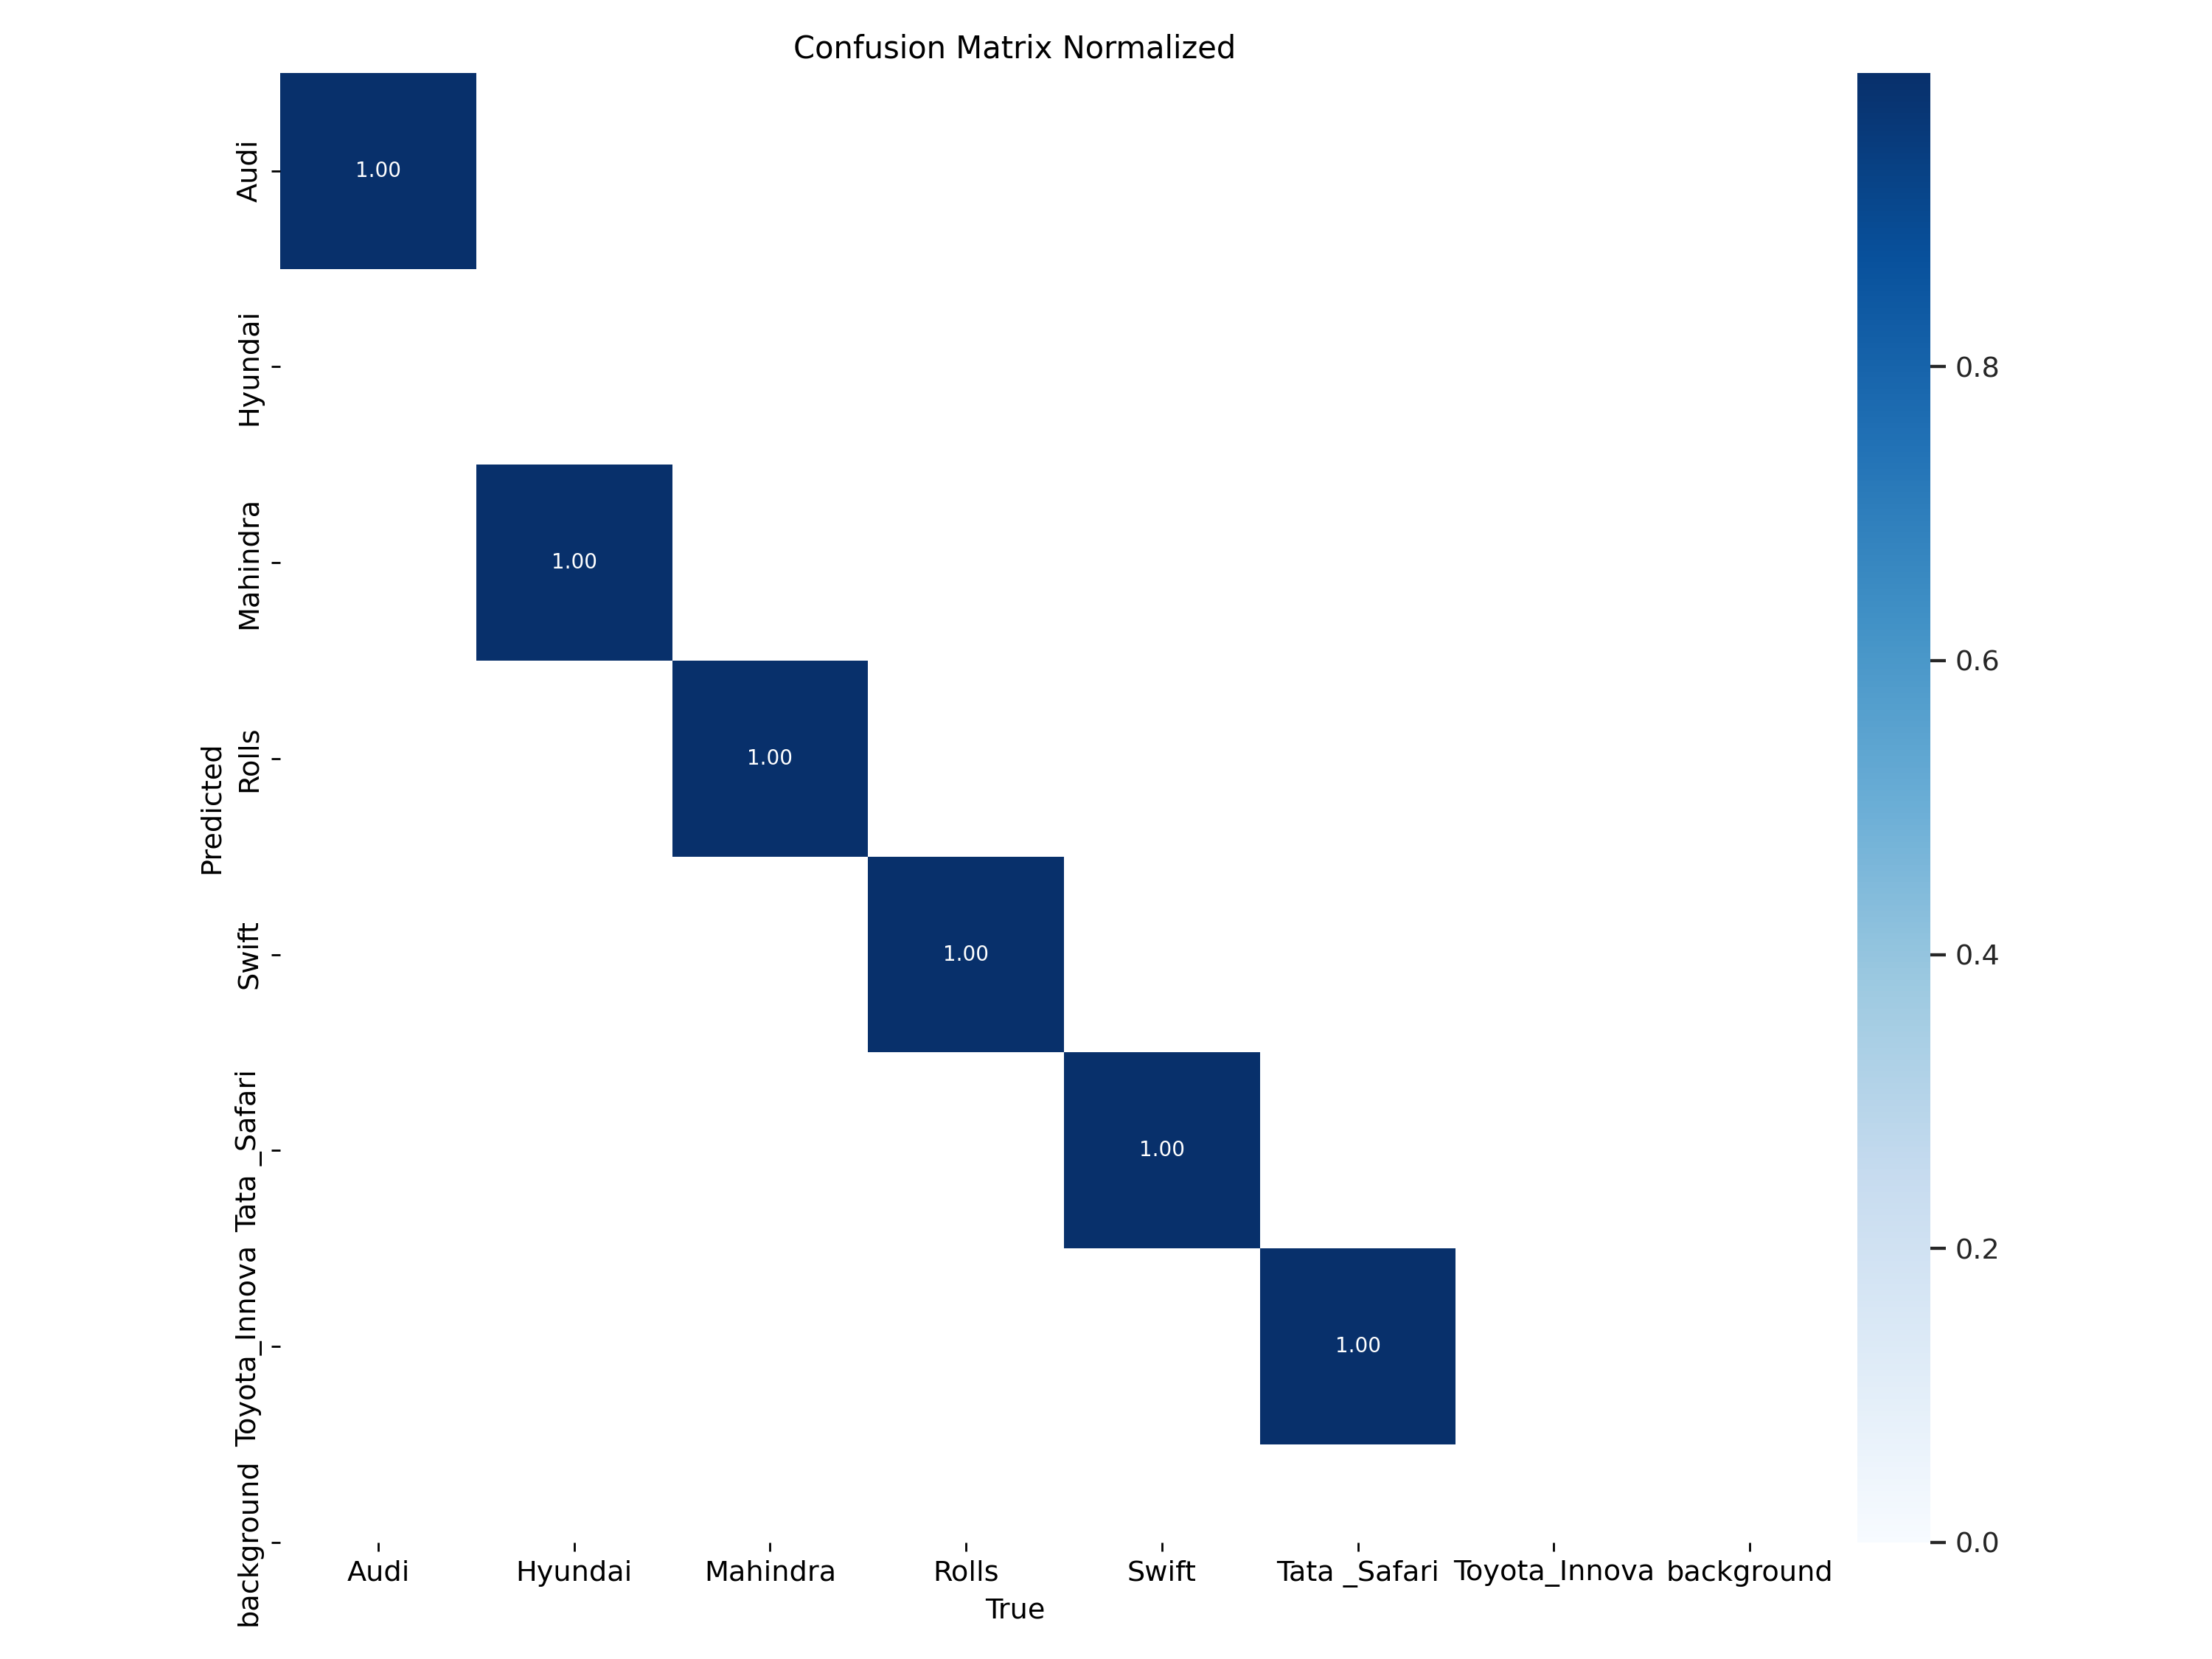

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train/confusion_matrix_normalized.png', width=600)

/content


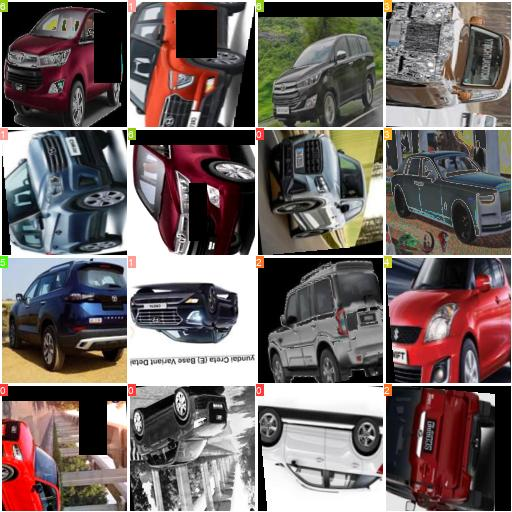

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train/train_batch0.jpg', width=600)

/content


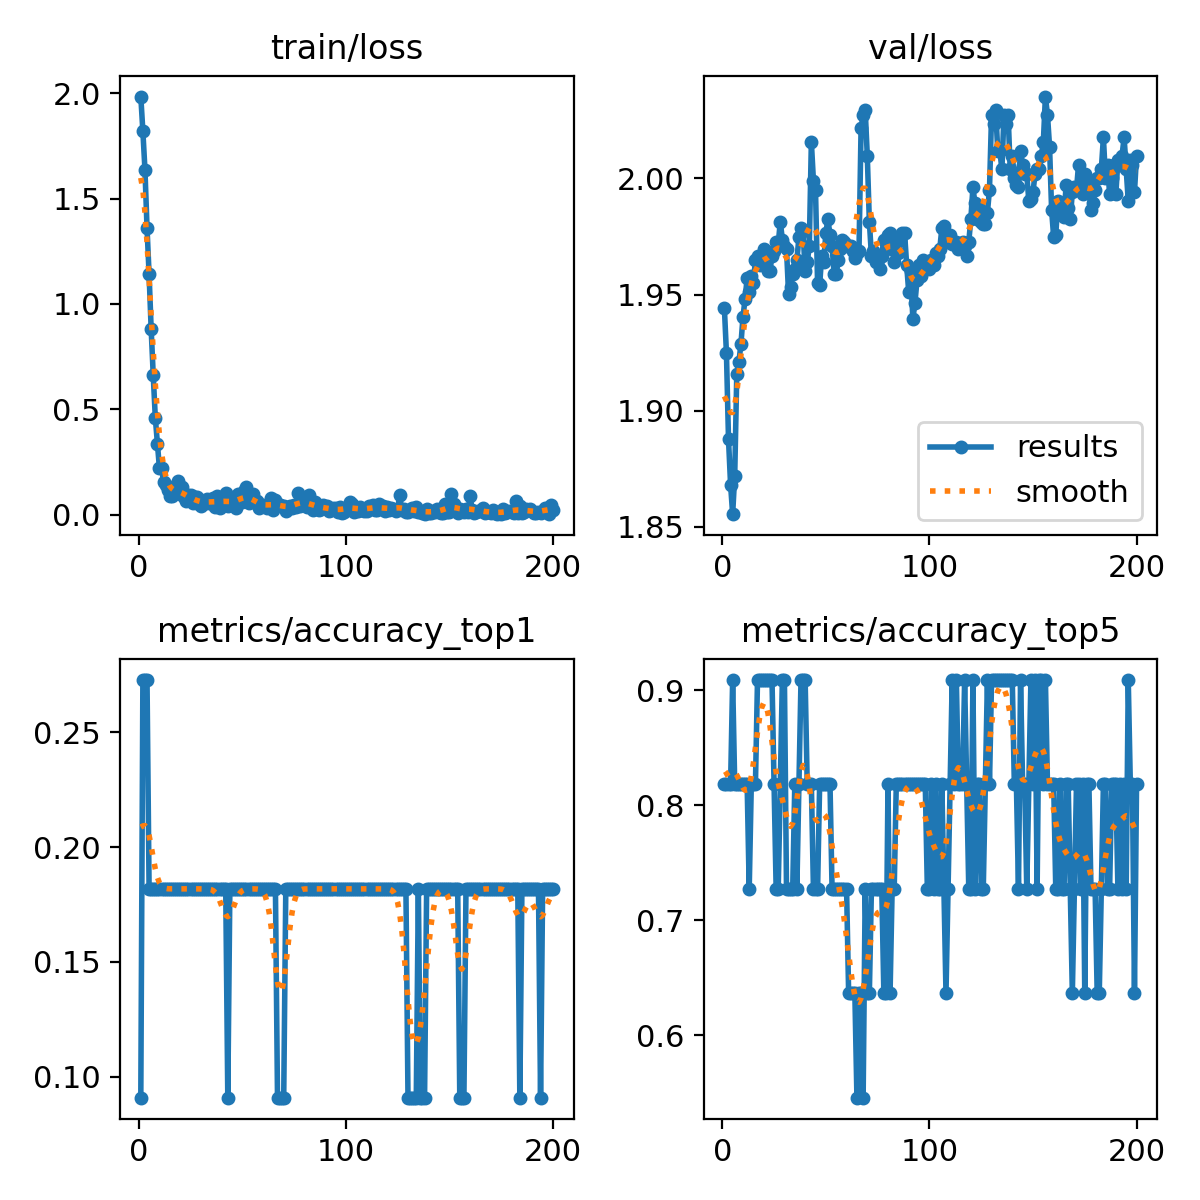

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/train/results.png', width=600)

In [ ]:
!cat {HOME}/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.9845,                0.09091,                0.81818,                 1.9443,              0.0001071,              0.0001071,              0.0001071
                      2,                 1.8195,                0.27273,                0.81818,                 1.9248,             0.00022024,             0.00022024,             0.00022024
                      3,                 1.6378,                0.27273,                0.81818,                 1.8877,             0.00033226,             0.00033226,             0.00033226
                      4,                 1.3619,                0.27273,                0.81818,                 1.8682,             0.00044314,             0.00044314,             0.00044314
                      5,                

In [ ]:
%cd {HOME}
!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data={dataset.location}

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5084167 parameters, 0 gradients, 12.5 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Car_class-1/train... found 245 images in 7 classes ✅ 
val: None...
test: /content/Car_class-1/test... found 11 images in 6 classes: ERROR ❌️ requires 7 classes, not 6
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 582, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 527, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/l

In [ ]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/Audi

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5084167 parameters, 0 gradients, 12.5 GFLOPs

image 1/2 /content/Car_class-1/test/Audi/45_jpg.rf.06f652fa6d719471573b9152e228d6ed.jpg: 128x128 Audi 0.70, Swift 0.26, Toyota_Innova 0.03, Rolls 0.01, Mahindra 0.00, 4.9ms
image 2/2 /content/Car_class-1/test/Audi/46_jpg.rf.9d83f429428f6f0f9af792e9a7e9d3d4.jpg: 128x128 Audi 0.99, Swift 0.01, Mahindra 0.00, Rolls 0.00, Tata _Safari 0.00, 4.5ms
Speed: 11.4ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


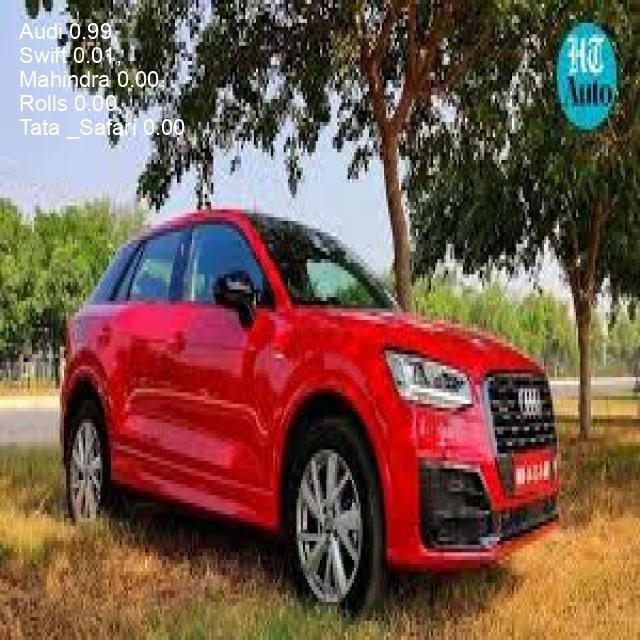

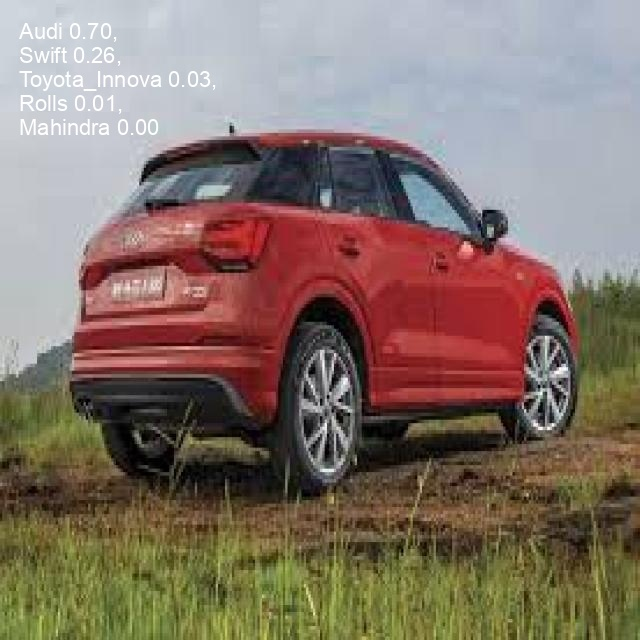

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/Mahindra

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5084167 parameters, 0 gradients, 12.5 GFLOPs

image 1/1 /content/Car_class-1/test/Mahindra/44-Copy-Copy_jpg.rf.cf6c9129b15d9057765ede47cfddb15e.jpg: 128x128 Mahindra 1.00, Swift 0.00, Rolls 0.00, Tata _Safari 0.00, Hyundai 0.00, 4.7ms
Speed: 8.5ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


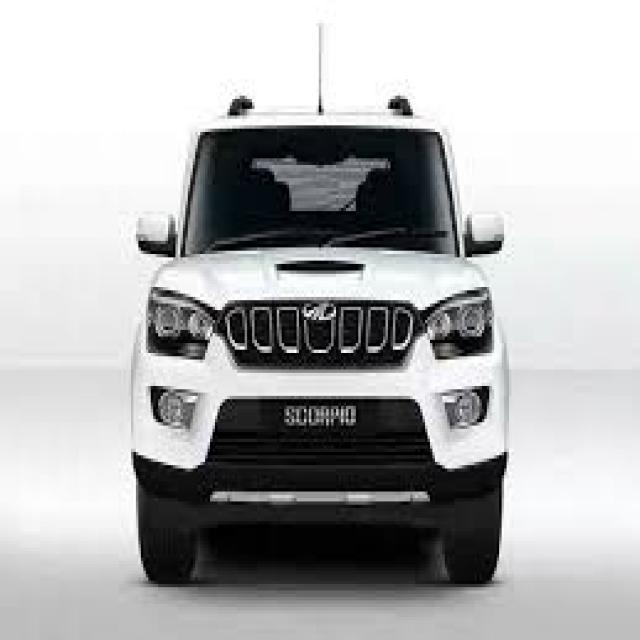

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/Rolls

/content
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5084167 parameters, 0 gradients, 12.5 GFLOPs

image 1/1 /content/Car_class-1/test/Rolls/42-Copy-2-_jpg.rf.c86cf80688724cea8ae9bc3836700e9a.jpg: 128x128 Rolls 0.54, Audi 0.23, Tata _Safari 0.22, Toyota_Innova 0.01, Mahindra 0.00, 4.6ms
Speed: 8.3ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/classify/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


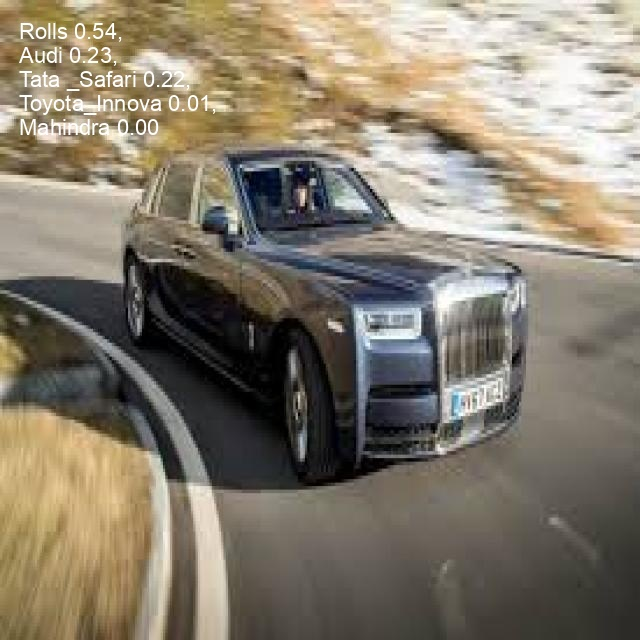

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Code from here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics --quiet
from ultralytics import YOLO
import os
import cv2
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
classModel = YOLO("/content/drive/MyDrive/car_dataset_for_classification/Car_class.pt")

img = "/content/6.jpg"
readImg = cv2.imread(img)
readImgmargin = cv2.imread(img)
classResults = classModel.predict(source=img, conf=0.1)
name=classResults[0].names
prediction=classResults[0].probs.top1
print(name,prediction)
prediction_percent=classResults[0].probs.top5conf.cpu().numpy()[0]
final=name[prediction]

print(prediction_percent)

if prediction_percent>0.60:
  final=final
else:
  final='outside_images'

print(final)